# ACTIVIDAD 3
Integrantes:
Luz Angela Rojas Prieto
William Ávila Corchuelo
Eliana Poveda Madrid
# PARTE I

## 1. Importar librerías de Pandas

In [1]:
#Las librerias son modulos de python que contienen funciones y objetos que pueden ser utilizados para realizar tareas específicas. En este caso, las librerias matplotlib, seaborn y plotly son librerias de visualización de datos. Cada vez que se inicializa el entorno de ejecución, es necesario volver a cargar todas las librerias que se van a utilizar en el notebook.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Cargar base de datos

In [2]:
df1 = pd.read_csv('datos_secop_I_modified.csv')
df1.shape
df1.head(1)

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
0,303062,28500134,CASANARE ESE HOSPITAL DE YOPAL !,891855029,2022,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,Almacen Hospital Regional de la Orinoquia Cont...,126898133557,NaN,$nan,12/31/21,2022-01-31T11:53:47.000,Yopal,Casanare,PLAN UNICO,85001


In [3]:
df2 = pd.read_csv("datos_secov_II_modified.csv",sep = ';', encoding='latin1')
df2.shape
df2.head(1)

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,...,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
0,CO1.APP.2041264,MarketplaceCO1538159,2024,721520377,INSTITUCION EDUCATIVA AGROPECUARIA MAXIMO GOMEZ,MISION 2023 2026 La Institucin Educativa Agrop...,Ser una institucin destacada por sus estrategi...,MARIA EUGENIA LEDESMA LLANTEN,3104661182,mariaeugenia.maestra@gmail.com,...,$26000000.0,$2600000.0,2024-07-31 03:47:42.6041815,2024-08-23 07:11:00.0000000,2024-08-22 20:32:26.391947400,2,CO1.PPI.33807381,Borrador,Cauca,Cajibío


## 3. Determinar el tipo de variables

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   identificador_paa           1000 non-null   int64 
 1   codigo_entidad              1000 non-null   int64 
 2   nombre_entidad              1000 non-null   object
 3   nit_entidad                 1000 non-null   object
 4   anno_paa                    1000 non-null   int64 
 5   direccion_entidad           1000 non-null   object
 6   telefono_entidad            1000 non-null   object
 7   mision_y_vision             997 non-null    object
 8   perspectiva_estrategica     950 non-null    object
 9   info_contacto               998 non-null    object
 10  ppto_total                  998 non-null    object
 11  limite_menor_cuantia        990 non-null    object
 12  limite_minima_cuantia       990 non-null    object
 13  fecha_ultima_actualizacion  989 non-null    objec

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   identificador_unico                 1000 non-null   object
 1   id_plan_anual_de_adquisiciones      1000 non-null   object
 2   anno                                1000 non-null   int64 
 3   nit_entidad                         1000 non-null   object
 4   nombre_entidad                      1000 non-null   object
 5   mision_vision                       1000 non-null   object
 6   perspectiva_estrategica             1000 non-null   object
 7   nombre_contacto                     1000 non-null   object
 8   telefono_contacto                   1000 non-null   object
 9   correo_contacto                     1000 non-null   object
 10  valor_presupuesto_general           1000 non-null   object
 11  presupuesto_menor_cuantia           1000 non-null   objec

## 4. Limpieza NIT

4.1 Aplicaremos limpieza de la variable **nit_entidad** para realizar merge y limpiar las bases ya unificadas

 Aplicar las funciones revisadas, según cada tipo de variable. Realizar la limpieza de la variable NIT proveedor.
| Aplicar las funciones revisadas, para la transformación del dato y cambiar su tipo

In [6]:
#Verificar longitud de la columna nit df1
df1['nit_entidad'].str.len()

0       9
1       9
2      11
3       9
4      11
       ..
995     9
996     9
997    11
998     9
999     9
Name: nit_entidad, Length: 1000, dtype: int64

In [7]:
#Verificar longitud de la columna nit df2
df2['nit_entidad'].str.len()

0       9
1       9
2       9
3       9
4       9
       ..
995    11
996    11
997    11
998     9
999     9
Name: nit_entidad, Length: 1000, dtype: int64

In [8]:
#Definir función para limpieza de NIT
def limpieza_nit (df: pd.DataFrame, column_name:object):
    df[column_name]= df[column_name].str.strip()
    df[column_name]= df[column_name].replace("  ","")
    df[column_name]= df[column_name].replace(" ","")
    df[column_name]= df[column_name].replace('[^\\w\\d\\s\\.]','',regex=True)
    df[column_name]= df[column_name].replace('$','')
    return df


In [9]:
#Aplicar función df1
limpieza_nit (df1,'nit_entidad')
df1.sample()

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
140,267473,215638011,BOYAC ALCALDA MUNICIPIO DE SCHICA,8001036638,2021,#Carera 4 N 3 41,57 8 7342149,La Alcalda Municipal de Schica Boyac presta s...,En el ano 2023 el Municipio de Sachica sera re...,NaN,$HUGO BUITRAGO,$407497173200,254387280,25438728,2021-01-30T01:42:20.000,Sáchica,Boyacá,UNICO PLAN,15638


In [10]:
#Aplicar función df2
limpieza_nit (df2,'nit_entidad')
df2.sample(1)

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,...,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
668,CO1.APP.1434127,MarketplaceCO1218676,2022,7058512855,INSTITUCION EDUCATIVA CONCENTRACION ESCOLAR SA...,MISINSomos una Institucin pblica que busca for...,Aplicar la poltica educativa del estado colomb...,OSCAR JOSE CONTRERAS BARRETO,3107284015,ie.concentracionsanjuan@sucre.edu.co,...,280000000.0,$28000000.0,2022-08-29 23:45:37.8954462,2024-08-09 19:40:53.0000000,2023-01-31 15:59:01.432708800,4,CO1.PPI.22884672,Publicado,Sucre,San Juan De Betulia


In [11]:
#Extraer los primeros 9 dígitos de la variable nit_entidad
def extraer_9digitos(df,column_name):
    df[column_name]=df[column_name].str[0:9]
    return df

In [12]:
#Aplicar función extraer_9digitos df1
extraer_9digitos (df1,'nit_entidad')
df1.sample(1)

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
624,272941,24100128,HUILA INSTITUCIN EDUCATIVA SANTA TERESA NEIVA,813003170,2021,CARRERA 23 No 4B 18,8701922,La institucin educativa Santa Teresa tiene com...,Al ao 2025 la institucin educativa Santa Teres...,La institucin educativa Santa Teresa implement...,iesantateresagmailcom,$49266558,254387280,25438728,2021-02-01T01:04:08.000,Neiva,Huila,UNICO PLAN,41001


In [13]:
#Aplicar función extraer_9digitos df2
extraer_9digitos (df2,'nit_entidad')
df2.sample(1)

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,...,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
631,CO1.APP.532521,MarketplaceCO174190,2019,701702409,POLICÍA METROPOLITANA DE SAN JUAN DE PASTO,La Polica Nacional tendr como Misin permanente...,Al 2018 la Polica Nacional ser la Institucin m...,HEBER DULCE PASTUSAN,3127952640,heber.dulce@correo.policia.gov.co,...,828116000.0,82811600.0,2019-02-04 19:58:02.4934109,2024-08-09 19:40:53.0000000,2019-12-10 21:38:18.432995400,26,CO1.PPI.5035902,Publicado,Nariño,Pasto


In [14]:
#Probar que quede correcto
df1['nit_entidad'].str.len()

0      9
1      9
2      9
3      9
4      9
      ..
995    9
996    9
997    9
998    9
999    9
Name: nit_entidad, Length: 1000, dtype: int64

In [15]:
df1['nit_entidad'].value_counts()

nit_entidad
No Defini    48
800099489     3
892099234     3
800095760     3
800102801     3
             ..
806014388     1
800229887     1
821002935     1
890706623     1
812001531     1
Name: count, Length: 884, dtype: int64

In [16]:
len(df1["nit_entidad"].unique())

884

#### Considerando que el NIT no es un identificador único para ambos Df no es posible realizar merge, por otro lado analizando las demás variables notamos que las variables listadas a continuación difieren aunque su etiqueta es similar:

**identificador_paa (SECOPI)**: Código generado en la plataforma para identificar la Entidad que publica tanto los procesos como el Plan Anual de Adquisiciones 6 digítos númericos 

**identificador_unico SECOPII**: Identificador unico del plan anual de adquisiones 7 dígitos númericos y el texto 'C01.AP'

Por tanto, realizaremos limpieza texto y númerica de ambos Df y luego escogeremos las columnas para realizar concatenar


## 5. Limpieza Texto 

### 5.1 Limpieza df1

In [17]:
#Definir una función para limpiar variables tipo texto
def limpieza_str (df: pd.DataFrame, column_name:object):
    df[column_name]= df[column_name].str.strip()
    df[column_name] =df[column_name].str.upper()
    df[column_name]= df[column_name].replace("  ","")
    df[column_name]= df[column_name].replace(" ","")
    df[column_name]= df[column_name].replace('[^\\w\\d\\s\\.]','',regex=True)
    df[column_name]= df[column_name].replace('$','')
    df[column_name]= df[column_name].replace('\\-','')
    df[column_name]= df[column_name].str.replace('Á', 'A') ## limpieza de las tildes 
    df[column_name]= df[column_name].str.replace('É', 'E')
    df[column_name]= df[column_name].str.replace('Í', 'I')
    df[column_name]= df[column_name].str.replace('Ó', 'O')
    df[column_name]= df[column_name].str.replace('Ú', 'U')
    return df


In [18]:
#Identificar las columnas tipo texto df1
columnas_str = df1.select_dtypes(include=['object']).columns.tolist()
print(columnas_str)

['nombre_entidad', 'nit_entidad', 'direccion_entidad', 'telefono_entidad', 'mision_y_vision', 'perspectiva_estrategica', 'info_contacto', 'ppto_total', 'limite_menor_cuantia', 'limite_minima_cuantia', 'fecha_ultima_actualizacion', 'fecha_cargue', 'municipio_paa', 'departamento_paa', 'localidad_paa']


In [19]:
limpieza_str (df1,'nombre_entidad')
limpieza_str (df1,'direccion_entidad')
limpieza_str (df1,'telefono_entidad')
limpieza_str (df1,'mision_y_vision')
limpieza_str (df1,'perspectiva_estrategica')
limpieza_str (df1,'info_contacto')
limpieza_str (df1,'ppto_total')
limpieza_str (df1,'limite_menor_cuantia')
limpieza_str (df1,'limite_minima_cuantia')
limpieza_str (df1,'municipio_paa')
limpieza_str (df1,'departamento_paa')
limpieza_str (df1,'localidad_paa')
df1.sample(1)

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
241,284874,28899260,SANTANDER CONCEJO MUNICIPIO DE FLORIDABLANCA,804011758,2021,CALLE 5 NO 8 25 PISO CUARTO,6751661,EL CONCEJO MUNICIPAL DE FLORIDABLANCA ES UNA C...,EL CONCEJO MUNICIPAL DE FLORIDABLANCA SE HA PL...,JOVAN BONERGES MARQUEZ BENAVIDES,1045697413,254387280,25438728,8/2/21,2021-09-03T04:53:59.000,FLORIDABLANCA,SANTANDER,UNICO PLAN,68276


### 5.2 Limpieza df2

In [20]:
#Identificar las columnas tipo texto df2
columnas_str2 = df2.select_dtypes(include=['object']).columns.tolist()
print(columnas_str2)

['identificador_unico', 'id_plan_anual_de_adquisiciones', 'nit_entidad', 'nombre_entidad', 'mision_vision', 'perspectiva_estrategica', 'nombre_contacto', 'telefono_contacto', 'correo_contacto', 'valor_presupuesto_general', 'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia', 'fecha_de_publicacion', 'fecha_de_creacion', 'fecha_de_ultima_modificacion', 'identificador_requerimiento_compra', 'estado', 'departamento_paa', 'municipio_paa']


In [21]:
limpieza_str (df2,'identificador_unico')
limpieza_str (df2,'id_plan_anual_de_adquisiciones')
limpieza_str (df2,'nit_entidad')
limpieza_str (df2,'nombre_entidad')
limpieza_str (df2,'mision_vision')
limpieza_str (df2,'perspectiva_estrategica')
limpieza_str (df2,'nombre_contacto')
limpieza_str (df2,'telefono_contacto')
limpieza_str (df2,'correo_contacto')
limpieza_str (df2,'valor_presupuesto_general')
limpieza_str (df2,'presupuesto_menor_cuantia')
limpieza_str (df2,'presupuesto_minima_cuantia')
limpieza_str (df2,'identificador_requerimiento_compra')
limpieza_str (df2,'estado')
limpieza_str (df2,'departamento_paa')
limpieza_str (df2,'municipio_paa')
df2.sample(1)

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,...,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
68,CO1.APP.2041153,MARKETPLACECO1426596,2024,700562028,CORPOURABA,MISIN CORPOURABA COMO AUTORIDAD AMBIENTAL DE L...,AVANZAR HACIA LA GENERACIN DE NUEVAS FUENTES D...,CRISTIAN MESTRA JARAMILLO,8281022,CJARAMILLOCORPOURABA.GOV.CO,...,364000000.0,36400000.0,2024-01-30 16:22:56.0098735,2024-08-23 07:11:00.0000000,2024-08-22 15:43:43.013400400,104,CO1.PPI.33799337,PUBLICADO,ANTIOQUIA,APARTADO


## 6. Limpieza Numerica

### 6.1 Eliminar nulos

#### Dataframe df1

In [22]:
#Mostrar valores nulos por cada columna
display(df1.isnull().sum())
#Eliminar los valores nulos
df1 = df1.dropna()

identificador_paa              0
codigo_entidad                 0
nombre_entidad                 0
nit_entidad                    0
anno_paa                       0
direccion_entidad              0
telefono_entidad               0
mision_y_vision                3
perspectiva_estrategica       50
info_contacto                  2
ppto_total                     2
limite_menor_cuantia          10
limite_minima_cuantia         10
fecha_ultima_actualizacion    11
fecha_cargue                   0
municipio_paa                  0
departamento_paa               0
localidad_paa                  0
codigo_municipio               0
dtype: int64

#### Dataframe df2

In [31]:
#Mostrar valores nulos por cada columna
display(df2.isnull().sum())
#Eliminar los valores nulos
df2 = df2.dropna()

identificador_unico                   0
id_plan_anual_de_adquisiciones        0
anno                                  0
nit_entidad                           0
nombre_entidad                        0
mision_vision                         0
perspectiva_estrategica               0
nombre_contacto                       0
telefono_contacto                     0
correo_contacto                       0
valor_presupuesto_general             3
presupuesto_menor_cuantia             0
presupuesto_minima_cuantia            0
fecha_de_publicacion                  0
fecha_de_creacion                     0
fecha_de_ultima_modificacion          0
version                               0
identificador_requerimiento_compra    0
estado                                0
departamento_paa                      0
municipio_paa                         0
dtype: int64

### 6.1 Crear una función de limpieza numerica

In [24]:
#Crear una función para limpieza de las variables númericas aplicando replace ()
def limpieza_numerica (df: pd.DataFrame, column_name:int):
    df[column_name] = df[column_name].replace("  ","")
    df[column_name] = df[column_name].replace('[^\\d\\.]','',regex=True)
    df[column_name] = df[column_name].replace('','0')
    return df

#### Dataframe df1

In [25]:
#Aplicar limpieza_numerica en df1
limpieza_numerica (df1,'identificador_paa')
limpieza_numerica (df1,'codigo_entidad')
limpieza_numerica (df1,'nit_entidad')
limpieza_numerica (df1,'anno_paa')
limpieza_numerica (df1,'ppto_total')
limpieza_numerica (df1,'limite_menor_cuantia')
limpieza_numerica (df1,'limite_minima_cuantia')
limpieza_numerica (df1, 'codigo_municipio')
df1.sample()

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
275,333274,225518017,CUNDINAMARCA INSTITUCIN EDUCATIVA RURAL DEPAR...,832005210,2022,INSPECCIN TUDELA CENTRO,3103078240,MISION ORIENTAR CIUDADANOS CAPACES DE PROYECT...,LAS REAS ESTRATEGICAS DE LA INSTITUCION SON LA...,LUIS EDUARDO NIETO RINCONRECTORNIETO59HOTMAILCOM,72393538,231872480,23187248,12/12/21,2023-02-04T08:11:10.000,PAIME,CUNDINAMARCA,UNICO PLAN,25518


In [26]:
#ppto_total
df1['ppto_total'] = pd.to_numeric(df1['ppto_total'], errors='coerce')
df1['ppto_total']= df1['ppto_total'].astype(int)

#limite_menor_cuantia
df1['limite_menor_cuantia'] = pd.to_numeric(df1['limite_menor_cuantia'], errors='coerce')
df1['limite_menor_cuantia']= df1['limite_menor_cuantia'].astype(int)

#limite_minima_cuantia
df1['limite_minima_cuantia'] = pd.to_numeric(df1['limite_minima_cuantia'], errors='coerce')
df1['limite_minima_cuantia']= df1['limite_minima_cuantia'].astype(int)

#Verificar columnas tipo numerico df1
columnas_str3 = df1.select_dtypes(include=['int']).columns.tolist()
print(columnas_str3)

['identificador_paa', 'codigo_entidad', 'anno_paa', 'ppto_total', 'limite_menor_cuantia', 'limite_minima_cuantia', 'codigo_municipio']


#### Dataframe df2

In [27]:
#['anno', 'nit_entidad', 'valor_presupuesto_general', 'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia', 'version']
#Aplicar limpieza_numerica en df2
limpieza_numerica (df2,'anno')
limpieza_numerica (df2,'nit_entidad')
limpieza_numerica (df2,'valor_presupuesto_general')
limpieza_numerica (df2,'presupuesto_menor_cuantia')
limpieza_numerica (df2,'presupuesto_minima_cuantia')
limpieza_numerica (df2,'version')
df2.sample()

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,...,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
229,CO1.APP.2040417,MARKETPLACECO1494215,2024,706029923,INSTITUCION EDUCATIVA EL LIMON,MISINFORMAR BACHILLERES ACADMICOS CON ESPECIAL...,LA INSTITUCIN EDUCATIVA TCNICA AGROPECUARIA E...,JOS LUIS MARTINEZ ABAD,3205220847,JOCHELUIS77HOTMAIL.COM,...,364000000.0,36400000.0,2024-05-30 12:37:21.3589785,2024-08-23 07:11:00.0000000,2024-08-22 01:16:50.348850000,7,CO1.PPI.33788693,PUBLICADO,SUCRE,SAN MARCOS


### 6.3 Convertir str a int

In [32]:
df2['valor_presupuesto_general'] = pd.to_numeric(df2['valor_presupuesto_general'], errors='coerce')
df2['valor_presupuesto_general']= df2['valor_presupuesto_general'].astype(int)

df2['presupuesto_menor_cuantia'] = pd.to_numeric(df2['presupuesto_menor_cuantia'], errors='coerce')
df2['presupuesto_menor_cuantia']= df2['presupuesto_menor_cuantia'].astype(int)

df2['presupuesto_minima_cuantia'] = pd.to_numeric(df2['presupuesto_minima_cuantia'], errors='coerce')
df2['presupuesto_minima_cuantia']= df2['presupuesto_minima_cuantia'].astype(int)

columnas_str4 = df2.select_dtypes(include=['int']).columns.tolist()
print(columnas_str4)

['anno', 'valor_presupuesto_general', 'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia', 'version']


## 7. Unificar bases de datos SECOP I y SECOP II

Con el fin de concatenar las bases df1 y df2, seleccionaremos de cada DataFrame las columnas que se desean analizar,  

Se excluyen del análisis las siguientes variables están en **SECOPI** pero no en **SECOPII**:  
[codigo_entidad, direccion_entidad, telefono_entidad, localidad_paa, codigo_municipio]  

De igual forma, las variables relacionadas a continuación están en **SECOPII** pero no en **SECOPI**:
[id_plan_anual_de_adquisiciones, fecha_de_publicacion, version, identificador_requerimiento_compra, estado]





### 7.1 Unificar en una sola columna la información de contacto de SECOPII

In [33]:

df2['info_contacto2']=df2[['nombre_contacto','telefono_contacto','correo_contacto']].agg('-'.join,axis=1)
df2['info_contacto2'].head()


0    MARIA EUGENIA LEDESMA LLANTEN-3104661182-MARIA...
1    RAFAEL BASTIDAS SANCHEZ-3136820189-RAFABASTIDA...
2    JULIAN DAVID OLIVEROS SERRANO-8572013-COMPRASL...
3    CARLOS FERNANDO GERMAN CALAO-3127695263-CARLOS...
4    CRISTINA HOLGUIN GRISALES-3223001245-ALMACENLA...
Name: info_contacto2, dtype: object

### 7.2 Definir dos nuevos DataFrame que contengan únicamente las 14 variables a analizar


In [34]:
Df1 = df1[['identificador_paa','nombre_entidad','nit_entidad','anno_paa','mision_y_vision','perspectiva_estrategica','info_contacto','ppto_total',
'limite_menor_cuantia','limite_minima_cuantia','fecha_ultima_actualizacion','fecha_cargue','municipio_paa','departamento_paa']]

Df2 = df2[['identificador_unico','nombre_entidad','nit_entidad','anno','mision_vision','perspectiva_estrategica','info_contacto2','valor_presupuesto_general',
'presupuesto_menor_cuantia','presupuesto_minima_cuantia','fecha_de_ultima_modificacion','fecha_de_publicacion','municipio_paa','departamento_paa']]

#Es necesario renombrar las columnas del Df2 para que al concatenar Python identifique que se trata del mismo index
Df2 = Df2.rename(columns={'identificador_unico':'identificador_paa','nombre_entidad':'nombre_entidad','nit_entidad':'nit_entidad','anno':'anno_paa','mision_vision':'mision_y_vision','perspectiva_estrategica':'perspectiva_estrategica','info_contacto2':'info_contacto','valor_presupuesto_general':'ppto_total',
    'presupuesto_menor_cuantia':'limite_menor_cuantia','presupuesto_minima_cuantia':'limite_minima_cuantia','fecha_de_ultima_modificacion':'fecha_ultima_actualizacion','fecha_de_publicacion':'fecha_cargue','municipio_paa':'municipio_paa','departamento_paa':'departamento_paa'})
     

### 7.3 Concatenar los DataFrame Df1 y Df2  
Para realizar operaciones entre Dataframes es necesario identificar:
1. La estructura de cada DataFrame (Cantidad de filas y Columnas)
2. Identificar si existe un ID común en los Dataframes, es decir, el ID de la fila 1 en el DataFrame 1, lo podemos encontrar en la fila "X" del DataFrame 2 (Esta opción ya explicamos no es posible aplicarla por no contar con un único identificador.
3. Identificar si tenemos las mismas variables en cada uno de ellos, aplicaríamos método concat, según el cuál axix=1 indicamos que queremos unirlo por filas, si ponemos axis=0 se uniría por columnas.2

In [35]:
#Visualizar Df1 
Df1.head(1)

,identificador_paa,nombre_entidad,nit_entidad,anno_paa,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa
1,294652,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,900196642,2022,MISION LA INSTITUCIN EDUCATIVA DBORA ARANGO DE...,DIRECCIONAR LA INSTITUCIN PARA EL LOGRO DEL HO...,CARLOS ENRIQUE ROJAS SANCHEZ,84026639,0,20000000,12/1/21,2022-01-26T09:43:07.000,MEDELLIN,ANTIOQUIA


In [36]:
#Identificar cantidad de filas y columnas a unir
Df1.shape

(922, 14)

In [37]:
#Visualizar Df1 
Df2.head(1)

,identificador_paa,nombre_entidad,nit_entidad,anno_paa,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa
0,CO1.APP.2041264,INSTITUCION EDUCATIVA AGROPECUARIA MAXIMO GOMEZ,721520377,2024,MISION 2023 2026 LA INSTITUCIN EDUCATIVA AGROP...,SER UNA INSTITUCIN DESTACADA POR SUS ESTRATEGI...,MARIA EUGENIA LEDESMA LLANTEN-3104661182-MARIA...,98097506,26000000,2600000,2024-08-22 20:32:26.391947400,2024-07-31 03:47:42.6041815,CAJIBIO,CAUCA


In [38]:
#Identificar cantidad de filas y columnas a unir
Df2.shape

(997, 14)

In [77]:
#Concatenar los Df1 y Df2
Df3 = pd.concat([Df1,Df2],axis=0,ignore_index=True)
Df3.sample(20)

,identificador_paa,nombre_entidad,nit_entidad,anno_paa,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa
739,325611,SUCRE PERSONERA MUNICIPIO DE CAIMITO,823000869,2023,MISION LA PERSONERA MUNICIPAL DE CAIMITO ...,LA PERSONERA MUNICIPAL DE CAIMITO SUCRE TIENE ...,UBICACIN CABECERA MUNICIPAL DE CAIMITO EN EL D...,11000000,324800000,32480000,1/23/23,2023-01-25T09:33:00.000,CAIMITO,SUCRE
633,271064,META INSTITUCIN EDUCATIVA JOS EUSTASIO RIVERA...,892000680,2021,MISION LA INSTITUCION EDUCATIVA JOSE EUST...,LA INSTITUCION EDUCATIVA JOSE E RIVERA ES UN E...,RECTORA NELLY BARRERA ACOSTA EMAIL IEJOSEEUST...,80955596,254387280,25438728,18170520,2021-01-31T06:06:14.000,CUBARRAL,META
1222,CO1.APP.2041070,SENA REGIONAL GUAVIARE,703931881,2024,EL SENA EST ENCARGADO DE CUMPLIR LA FUNCIN QUE...,PARA EL AÑO 2026 EL SERVICIO NACIONAL DE APREN...,HELBERT CUBIDES QUITIAN-3114547043-HCUBIDESQSE...,14219492960,1300000000,130000000,2024-08-22 20:04:18.252024500,2024-01-12 20:53:53.2743077,SAN JOSE DEL GUAVIARE,GUAVIARE
128,316899,META INSTITUCIN EDUCATIVA ISABEL LA CATLICA ...,822006499,2022,NO DEFINIDO,NO DEFINIDO,NO DEFINIDO,0,0,0,05/15/2022,2022-05-15T05:45:07.000,SAN CARLOS DE GUAROA,META
759,281871,TOLIMA INSTITUCIN EDUCATIVA LAURELES IBAGU,809011608,2021,MISION LA INSTITUCIN EDUCATIVA LAURELES DEDICA...,LA CONVIVENCIA PACFICA EN EL MARCO DEL RESPETO...,RECTOR JOSUE FERNANDO MOLINA NIETO,38806768,254387280,25438728,11/20/20,2021-07-14T09:49:49.000,IBAGUE,TOLIMA
703,298788,MAGDALENA ALCALDA MUNICIPIO DE PLATO,891780051,2022,MISION GUIAR RESPONSABLEMENTE AL MUNICIPIO...,PROMOVER PROCESOS DE CONCERTACIN Y ESTABLECER ...,JAIME ALONSO PEAPEARANDA,83394450393,280000000,28000000,1/25/22,2022-01-28T05:37:33.000,PLATO,MAGDALENA
1760,CO1.APP.1682206,ESAP TERRITORIAL HUILACAQUETA Y BAJO PUTUMAYO,704787431,2023,MISIN LA ESCUELA SUPERIOR DE ADMINISTRACI...,LA ESAP EN CUMPLIMIENTO DE SU MARCO NORMATIVO ...,NELSON DARIO RINCON GARCIA-8721122-NELSRINCESA...,2970604009,522000000,52200000,2023-10-04 22:00:58.703204600,2023-01-31 15:26:46.0606973,NEIVA,HUILA
1903,CO1.APP.1461786,INSTITUCION EDUCATIVA INTERCULTURAL DOKABU,720719111,2023,LA INSTITUCIN EDUCATIVA INTERCULTURAL DOKAB ES...,LA INSTITUCIN EDUCATIVA INTERCULTURAL DOKAB ES...,INSTITUCION EDUCATIVA INTERCULTURAL DOKABU-315...,0,15000000,15000000000,2024-08-09 19:40:53.0000000,2022-01-01 00:00:00.0000000,PUEBLO RICO,RISARALDA
1547,CO1.APP.1453401,EMPRESA REGIONAL DE ACUEDUCTO Y SANEAIENTO BAS...,720447259,2023,LA EMPRESA REGIONAL DE ACUEDUCTO Y SANEAMIENTO...,LA EMPRESA REGIONAL DE ACUEDUCTO Y SANEAMIENTO...,JHHON JAIRO CORDOBA FUERTES-3132833079-GERENTE...,190000000,324800000,32480000,2023-02-14 23:24:15.227148000,2023-01-27 16:39:51.4426147,SUAREZ,TOLIMA
357,304186,LA GUAJIRA ALCALDA MUNICIPIO DE VILLANUEVA,892115198,2022,MISION LIDERAR Y ORIENTAR EL DESARROLLO MUNICI...,PLAN DE DESARROLLO VILLANUEVA DE TODOS 2020 2023,MERCEDES PEREIRA SECRETARIA GENERAL 3012239998...,2251001283995,280000000,28000000,01/31/2022,2022-01-31T03:17:52.000,VILLANUEVA,LA GUAJIRA


In [40]:
#Tamaño del Dataframe resultante
Df3.shape

(1919, 14)

## 7. Variables Exploradas

Se adjunta imagen de las variables exploradas, su explicación y se resalta en rojo las variables excluidas por no tener correspondencia

<img src="Comparación Variables.png">


# PARTE II

## 1. Filtro de variables

In [42]:
Df3['departamento_paa'].value_counts

<bound method IndexOpsMixin.value_counts of 0                        ANTIOQUIA
1                         PUTUMAYO
2                        ANTIOQUIA
3                             META
4                           BOYACA
                   ...            
1914    DISTRITO CAPITAL DE BOGOTA
1915                        NARIÑO
1916               VALLE DEL CAUCA
1917                       CORDOBA
1918                       CAQUETA
Name: departamento_paa, Length: 1919, dtype: object>

In [83]:
#Filtro para una sola condición.
filtro_1 = Df3[Df3['departamento_paa'] == 'HUILA']
filtro_1.sample(2)

,identificador_paa,nombre_entidad,nit_entidad,anno_paa,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa
189,290514,HUILA INSTITUCIN EDUCATIVA LUIS CALIXTO LEIVA...,813004410,2022,MISION COMO INSTITUCIN PBLICA NUESTRA VISIN ES...,LA INSTITUCIN EDUCATIVA LUIS CALIXTO LEIVA DE...,LUCERO OSORIO ARDILA RECTORA,147656200,254387280,25438728,11/10/21,2022-01-12T02:56:17.000,GARZON,HUILA
213,293115,HUILA INSTITUCIN EDUCATIVA YULUUCX PISHAU LA...,900071592,2022,MISION APORTAR AL DESARROLLO EDUCATIVO DE LOS ...,GESTIONAR LA PREINVERSIN E INVERSIN DE RECURSO...,JENY MILDRED GUEJIA PALOMINO CEL 3208570417,63374000,850,85,12/2/21,2022-01-24T07:20:09.000,LA PLATA,HUILA


In [82]:
#Filtro para multiples condiciones
filtro_2 = Df3.query("anno_paa == 2022 and departamento_paa == 'ANTIOQUIA'")
filtro_2.sample(2)

,identificador_paa,nombre_entidad,nit_entidad,anno_paa,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa
264,320775,ANTIOQUIA IE MATER DEI MEDELLN,811039065,2022,MISINSOMOS UNA INSTITUCIN EDUCATIVA DE CARCTER...,ESTABLECER RELACIONES DE IGUALDAD Y EQUIDAD,NANCY EUGENIA BERNAL PATIO,48613389,1001000,100,8/29/22,2022-08-29T07:35:18.000,MEDELLIN,ANTIOQUIA
1676,CO1.APP.1279047,FONDO DE VALORIZACION DEL MUNICIPIO DE MEDELLIN,712170091,2022,EN EL 2022 EL FONDO DE VALORIZACIN DEL ...,EFICIENCIA EN LA ADMINISTRACIN DE LOS RECURSOS...,GABRIELA CANO RAMREZ-5570246-GABRIELA.CANOFONV...,9952269983,450000000,45000000,2022-09-12 23:14:23.505504300,2022-01-04 01:34:14.0999501,MEDELLIN,ANTIOQUIA


In [45]:
Df3.columns

Index(['identificador_paa', 'nombre_entidad', 'nit_entidad', 'anno_paa',
       'mision_y_vision', 'perspectiva_estrategica', 'info_contacto',
       'ppto_total', 'limite_menor_cuantia', 'limite_minima_cuantia',
       'fecha_ultima_actualizacion', 'fecha_cargue', 'municipio_paa',
       'departamento_paa'],
      dtype='object')

In [46]:
Df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   identificador_paa           1919 non-null   object
 1   nombre_entidad              1919 non-null   object
 2   nit_entidad                 1919 non-null   object
 3   anno_paa                    1919 non-null   int64 
 4   mision_y_vision             1919 non-null   object
 5   perspectiva_estrategica     1919 non-null   object
 6   info_contacto               1919 non-null   object
 7   ppto_total                  1919 non-null   int64 
 8   limite_menor_cuantia        1919 non-null   int64 
 9   limite_minima_cuantia       1919 non-null   int64 
 10  fecha_ultima_actualizacion  1919 non-null   object
 11  fecha_cargue                1919 non-null   object
 12  municipio_paa               1919 non-null   object
 13  departamento_paa            1919 non-null   obje

## 2. Gráficos

### 2.1 Importar librerías

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats
import warnings 

%matplotlib inline 

In [48]:
plot = pd.concat([Df3['limite_menor_cuantia'],Df3['ppto_total']],axis=1)

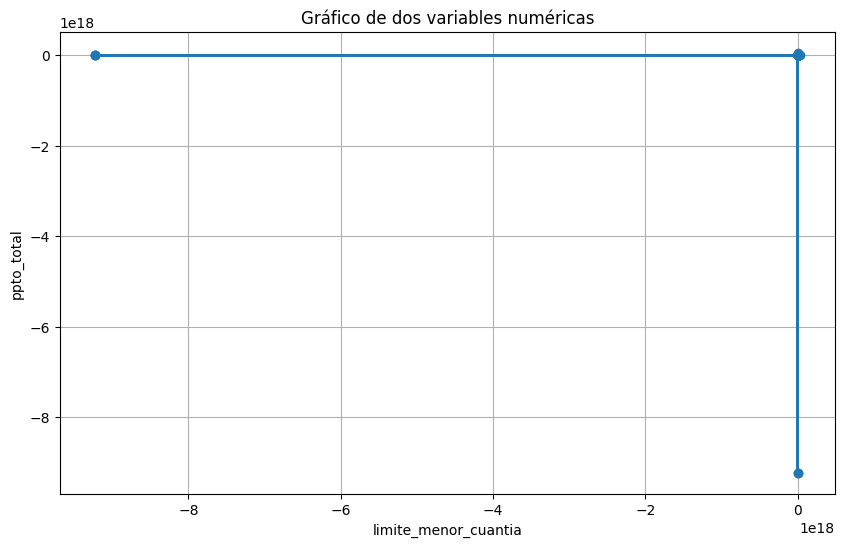

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(Df3['limite_menor_cuantia'], Df3['ppto_total'], marker='o')
plt.title('Gráfico de dos variables numéricas')
plt.xlabel('limite_menor_cuantia')
plt.ylabel('ppto_total')
plt.grid(True)
plt.show()

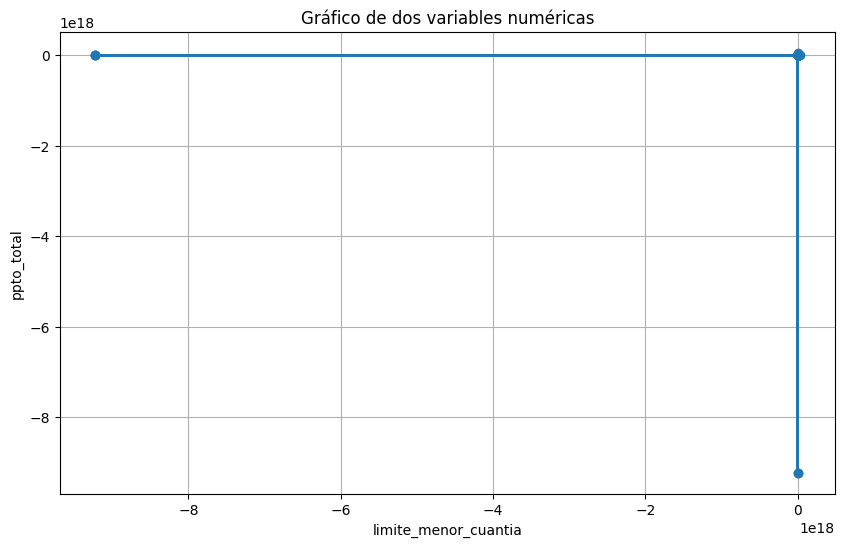

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(Df3['limite_menor_cuantia'], Df3['ppto_total'], marker='o')
plt.title('Gráfico de dos variables numéricas')
plt.xlabel('limite_menor_cuantia')
plt.ylabel('ppto_total')
plt.grid(True)
plt.show()

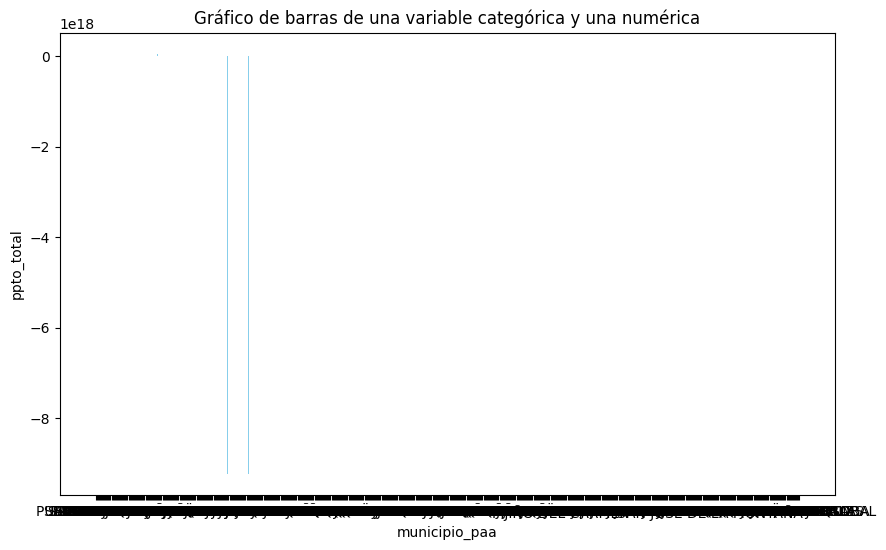

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(Df3['municipio_paa'], Df3['ppto_total'], color='skyblue')
plt.title('Gráfico de barras de una variable categórica y una numérica')
plt.xlabel('municipio_paa')
plt.ylabel('ppto_total')
plt.show()

### 2.2 Análisis Variables Númericas 
Análisis de las medidas de tendencia central y dispersión. Así mismo, vamos a hacer un análisis de la distribución de los datos.

#### Histograma

In [52]:
Df3['ppto_total'].min()

-9223372036854775808

In [53]:
Df3['ppto_total'].max()

58583645858372096

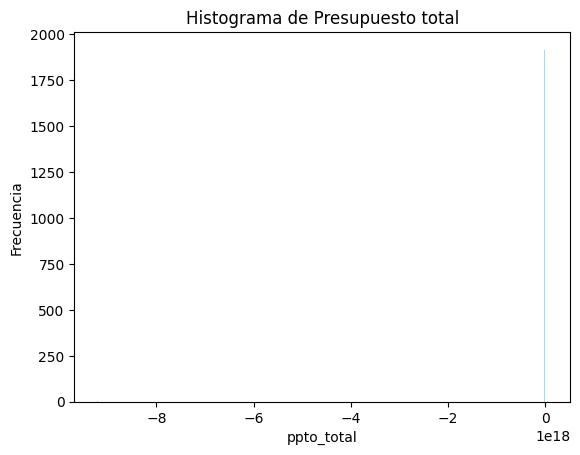

In [72]:
plt.hist(Df3['ppto_total'], bins=500, color='lightblue')
plt.xlabel('ppto_total')
plt.ylabel('Frecuencia')
plt.title('Histograma de Presupuesto total')
plt.show()

/tmp/ipykernel_612/562889312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departamento_paa', y='ppto_total', data=Df3, palette='viridis')


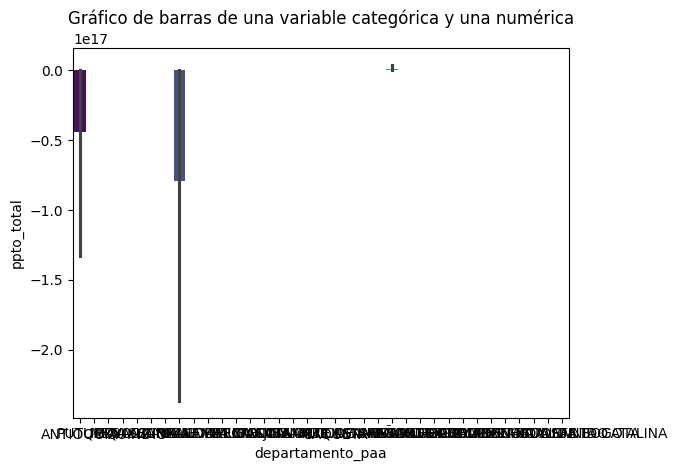

In [55]:
sns.barplot(x='departamento_paa', y='ppto_total', data=Df3, palette='viridis')
plt.title('Gráfico de barras de una variable categórica y una numérica')
plt.xlabel('departamento_paa')
plt.ylabel('ppto_total')
plt.show()

/tmp/ipykernel_612/2617560410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departamento_paa', y='ppto_total', data=Df3, palette='viridis')


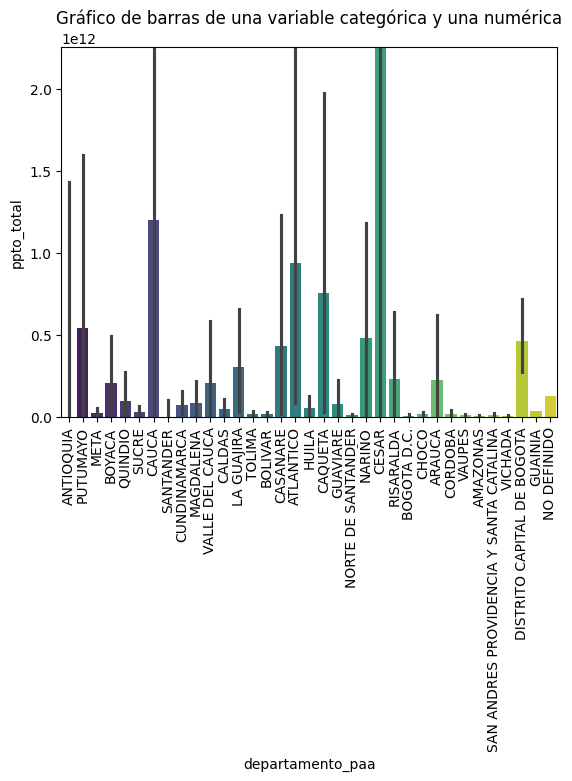

In [78]:
plt.xlim(-1, len(Df3['departamento_paa']))
plt.ylim(0, 2251001283995)
plt.xticks(rotation=90)
sns.barplot(x='departamento_paa', y='ppto_total', data=Df3, palette='viridis')
plt.title('Gráfico de barras de una variable categórica y una numérica')
plt.xlabel('departamento_paa')
plt.ylabel('ppto_total')
plt.show()

In [71]:
Df3['ppto_total'].describe()

count    1.919000e+03
mean    -9.581878e+15
std      2.976870e+17
min     -9.223372e+18
25%      6.895350e+07
50%      3.094772e+08
75%      1.298222e+10
max      5.858365e+16
Name: ppto_total, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29388d73-052e-433b-ab71-586b8d3047c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>